In [276]:
import mysql.connector
import pandas as pd
from config import *
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import scipy.stats as stats
from bioinfokit.analys import stat


In [277]:
my_user='tec_A00827467'
secret='K2CEKmYT1Z#qb02R'
config = {
    'user': my_user,
    'password': secret,
    'host': 'topline.dwh.suite.ghp.mx',
    'database': 'dwh',
    'raise_on_warnings': True
}

cnx = mysql.connector.connect(**config)

In [278]:
DM_Chains = pd.read_sql("SELECT * FROM  DM_Chains", cnx)

DM_Venues = pd.read_sql("SELECT * FROM  DM_Venues", cnx)

DM_Brands = pd.read_sql("SELECT * FROM  DM_Brands", cnx)

DM_Verticals = pd.read_sql("SELECT * FROM  DM_Verticals", cnx)

DM_Cities = pd.read_sql("SELECT * FROM  DM_Cities", cnx)

DM_States = pd.read_sql("SELECT * FROM  DM_States", cnx)

DM_Countries = pd.read_sql("SELECT * FROM  DM_Countries", cnx)

DM_Business_Dates = pd.read_sql("SELECT * FROM  DM_Business_Dates", cnx)

factTable = pd.read_sql("SELECT * FROM  FT_Nights", cnx)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 

In [279]:
DM_Brands.rename(columns = {'name':'brand_name'}, inplace= True)

DM_Chains.rename(columns = {'name':'chain_name'}, inplace= True)

DM_Cities.rename(columns = {'name':'city_name'}, inplace= True)

DM_Countries.rename(columns = {'name':'country_name','iso_code':'country_iso_code'}, inplace= True)

DM_States.rename(columns = {'name':'state_name','iso_code':'state_iso_code'}, inplace= True)

DM_Venues.rename(columns = {'name':'venue_name'}, inplace= True)

DM_Verticals.rename(columns = {'name':'vertical_name'}, inplace= True)


In [280]:
df = factTable.merge(DM_Venues, on='venue_id')

df = df.merge(DM_Brands, on="brand_id")

df = df.merge(DM_Chains, on="chain_id")

df = df.merge(DM_Verticals, on="vertical_id")

df = df.merge(DM_Cities, on="city_id")

df = df.merge(DM_States, on="state_id")

df = df.merge(DM_Countries, on="country_id")

df = df.merge(DM_Business_Dates, on="business_date_id")

In [281]:
df = df[df.found != 0]
df = df[df.active != 0]

In [282]:
datos = df.drop(['week_day_name', 'month_name_short','month_name','iso_week_year','available_rooms','country_id','country_iso_code','day', 'month', 'year', 'week_day',
 'day_of_year','venue_id', 'business_date_id', 'found','currency_id','brand_id','vertical_id', 'region_id', 'city_id', 'state_id','state_iso_code', 
 'iso_week_number','quarter', 'semester', 'incode','latitude','longitude'],axis= 1)

In [283]:
datos = datos[datos["venue_name"].str.contains("Wyndham") == True]

In [284]:
datos.venue_name.unique()

array(['Wyndham Garden Playa del Carmen',
       'Wyndham Garden Guadalajara Andares',
       'Wyndham Garden Monterrey Valle Real',
       'Microtel Inn & Suites by Wyndham Chihuahua',
       'Microtel Inn & Suites by Wyndham Ciudad Juárez',
       'Microtel Inn & Suites by Wyndham Toluca'], dtype=object)

## Exploración de datos

In [285]:
datos.describe()

,night_id,rooms_available,rooms_occupied,rooms_revenue,compset_rooms_available,compset_rooms_occupied,compset_rooms_revenue,active,chain_id
count,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000,5.205000e+03,5205.0,5205.0
mean,23030.120461,132.760231,50.185975,52290.286013,656.075889,254.542555,2.677102e+05,1.0,3.0
std,12276.225359,44.673215,37.014248,47627.971030,177.814075,158.810078,2.108280e+05,0.0,0.0
min,8821.000000,0.000000,0.000000,-9028.640000,0.000000,0.000000,-3.266100e+03,1.0,3.0
25%,12773.000000,108.000000,22.000000,18179.760000,586.000000,145.000000,1.239207e+05,1.0,3.0
50%,17602.000000,113.000000,45.000000,37702.380000,595.000000,236.000000,2.164067e+05,1.0,3.0
75%,31251.000000,186.000000,74.000000,75135.120000,766.000000,334.000000,3.511061e+05,1.0,3.0
max,46746.000000,196.000000,177.000000,399920.670000,1009.000000,951.000000,1.623219e+06,1.0,3.0


In [286]:
datos.dtypes

night_id                     int64
rooms_available              int64
rooms_occupied               int64
rooms_revenue              float64
compset_rooms_available      int64
compset_rooms_occupied       int64
compset_rooms_revenue      float64
venue_name                  object
active                       int64
postal_code                 object
brand_name                  object
chain_id                     int64
chain_name                  object
vertical_name               object
city_name                   object
state_name                  object
country_name                object
business_date               object
dtype: object

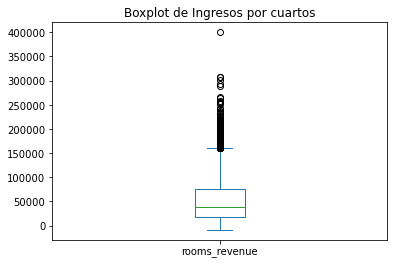

In [290]:
datos['rooms_revenue'].plot(kind = 'box', title = 'Boxplot de Ingresos por cuartos')
plt.show(); 

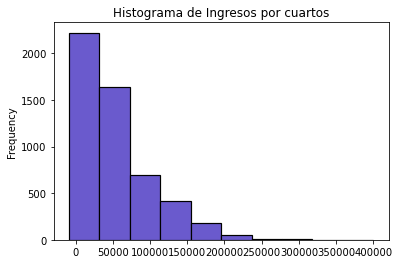

In [291]:
datos['rooms_revenue'].plot(kind = 'hist', color = 'slateblue', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histograma de Ingresos por cuartos')
plt.show();

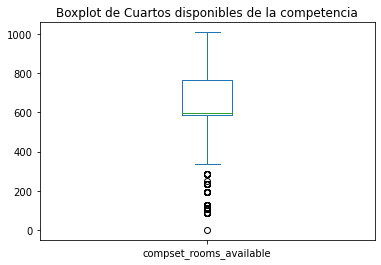

In [292]:
datos['compset_rooms_available'].plot(kind = 'box', title = 'Boxplot de Cuartos disponibles de la competencia')
plt.show(); 

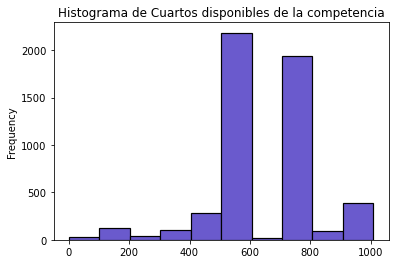

In [293]:
datos['compset_rooms_available'].plot(kind = 'hist', color = 'slateblue', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histograma de Cuartos disponibles de la competencia')
plt.show();

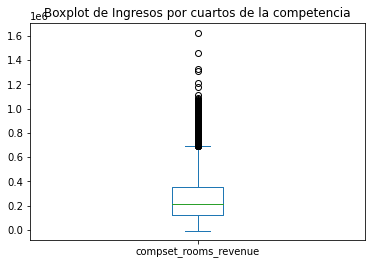

In [294]:
datos['compset_rooms_revenue'].plot(kind = 'box', title = 'Boxplot de Ingresos por cuartos de la competencia')
plt.show(); 

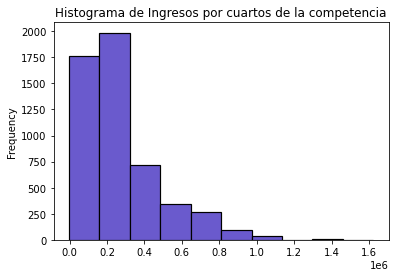

In [295]:
datos['compset_rooms_revenue'].plot(kind = 'hist', color = 'slateblue', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histograma de Ingresos por cuartos de la competencia')
plt.show();

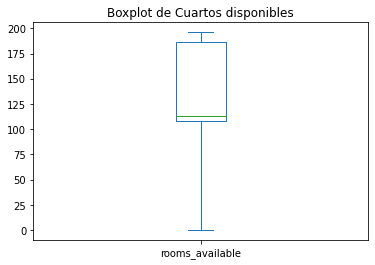

In [296]:
datos['rooms_available'].plot(kind = 'box', title = 'Boxplot de Cuartos disponibles')
plt.show(); 

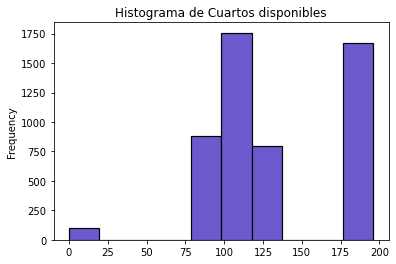

In [297]:
datos['rooms_available'].plot(kind = 'hist', color = 'slateblue', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histograma de Cuartos disponibles')
plt.show();

## Creación de modelo

In [ ]:
datos.corr()

In [ ]:
#Declaramos nuestras variables independientes 
X = pd.DataFrame(datos[['rooms_revenue', 'compset_rooms_available', 'compset_rooms_revenue']])
X = sm.add_constant(X)
#Definimos la variable dependiente
Y = pd.DataFrame(datos['rooms_occupied']) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

## Modelo lineal1

In [ ]:
model1 = sm.OLS(y_train,X_train).fit()

In [ ]:
print(model1.summary())

In [ ]:
mean_squared_error(y_test,model1.predict(X_test))


## Modelo Lineal2

In [ ]:
#Declaramos nuestras variables independientes 
X = pd.DataFrame(datos[['rooms_revenue', 'rooms_available']])
X = sm.add_constant(X)
#Definimos la variable dependiente
Y = pd.DataFrame(datos['rooms_occupied']) 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [ ]:
model2=LinearRegression()
model2.fit(X_train,y_train)
print(model2.intercept_, model2.coef_, model2.score(X_train,y_train))

In [ ]:
mean_squared_error(y_test,model2.predict(X_test))

## Regresión no lineal

### Regresión cuadrada

In [ ]:
sns.scatterplot(x=datos['rooms_revenue'], y=datos['rooms_occupied'])

In [ ]:
X = pd.DataFrame(X_train['rooms_revenue'])
X['x2']= X['rooms_revenue']**2
X

In [ ]:
model3=LinearRegression()
model3.fit(X[['rooms_revenue','x2']],y_train)
print(model3.intercept_, model3.coef_, model3.score(X[['rooms_revenue','x2']],y_train))

In [ ]:
X_test = pd.DataFrame(X_test['rooms_revenue'])
X_test['x2']= X_test['rooms_revenue']**2
mean_squared_error(y_test,model3.predict(X_test[['rooms_revenue','x2']]))

### Cálculo del mejor modelo no lineal

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


def get_MSE_for_degree_k_model (k):
    pipelined_model = Pipeline([
        ('transform', PolynomialFeatures(degree=k)),
        ('regression',LinearRegression(fit_intercept=True))
    ])
    pipelined_model.fit(X_train[['rooms_revenue']],y_train)
    return mean_squared_error(pipelined_model.predict(X_test[['rooms_revenue']]),y_test)

In [ ]:
ks=np.array(range(0,10))
MSEs = [get_MSE_for_degree_k_model(k) for k in ks]
MSEs_and_k =pd.DataFrame({'k':ks,'MSE':MSEs})
MSEs_and_k

### Se usara el modelo cúbico

In [ ]:
X = pd.DataFrame(X_train['rooms_revenue'])

In [ ]:
X['x2']= X['rooms_revenue']**2
X['x3']= X['rooms_revenue']**3

In [ ]:
X

In [ ]:
model3=LinearRegression()
model3.fit(X[['rooms_revenue','x2','x3']],y_train)
print(model3.intercept_, model3.coef_, model3.score(X[['rooms_revenue','x2','x3']],y_train))

In [ ]:
X_test = pd.DataFrame(X_test['rooms_revenue'])
X_test['x2']= X_test['rooms_revenue']**2
X_test['x3']= X_test['rooms_revenue']**3

In [ ]:
mean_squared_error(y_test,model3.predict(X_test[['rooms_revenue','x2','x3']]))

### Prueba ANOVA y Tukey

In [ ]:
model=ols('rooms_occupied ~ C(rooms_revenue) + C(compset_rooms_available) + C(compset_rooms_revenue)',data=datos).fit()
#('rooms_occupied ~ C(rooms_revenue) + C(compset_rooms_available) + C(compset_rooms_revenue) + C(city_name) + C(rooms_revenue):C(city_name) + C(compset_rooms_available):C(city_name) + C(compset_rooms_revenue):C(city_name)'
anova_table=sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
res=stat()
res.tukey_hsd(df=datos, res_var='rooms_occupied', xfac_var='city_name', anova_model='rooms_occupied ~ C(rooms_revenue): + C(compset_rooms_available) + C(compset_rooms_revenue)')
res.tukey_summary